## Business problem

***Predict if a customer is happy or not based on the answers they give to questions asked.***

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [110]:
# Import libraries

import numpy as np
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
# Load the dataset
df = pd.read_csv('C:/Users/Tooman/Desktop/ACME-HappinessSurvey2020.csv')

## Data Exploration

In [2]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [138]:
#column names
X1 = "on_time"
X2 = "contents"
X3 = "complete_order"
X4 = "good_price"
X5 = "satisfied"
X6 = "app_ease"
Y = "customer_sentiment"

In [141]:
#rename the columns

df.columns = ['customer_sentiment', 'on_time', 'contents', 'complete_order', 'good_price', 'satisfied', 'app_ease']

In [142]:
df.head()

,customer_sentiment,on_time,contents,complete_order,good_price,satisfied,app_ease
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [143]:
print(df.shape)
print(df.size)

(126, 7)
882


In [144]:
df.describe()

,customer_sentiment,on_time,contents,complete_order,good_price,satisfied,app_ease
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [145]:
# checks for missing values in the dataset
df.isnull().sum()

customer_sentiment    0
on_time               0
contents              0
complete_order        0
good_price            0
satisfied             0
app_ease              0
dtype: int64

In [146]:
print(df['on_time'].unique()) #the unique values for the columns

[3 5 4 1]


In [147]:
print(df['contents'].unique()) #the unique values for the columns

[3 2 4 5 1]


In [148]:
print(df['complete_order'].unique()) #the unique values for the columns

[3 2 4 5 1]


In [149]:
print(df['good_price'].unique()) #the unique values for the columns

[4 5 3 2 1]


In [150]:
print(df['satisfied'].unique()) #the unique values for the columns

[2 4 3 5 1]


In [151]:
print(df['app_ease'].unique()) #the unique values for the columns

[4 3 5 2 1]


In [152]:
df.corr()  #checks for the correlation of the variables against each other

,customer_sentiment,on_time,contents,complete_order,good_price,satisfied,app_ease
customer_sentiment,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
on_time,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
contents,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
complete_order,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
good_price,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
satisfied,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
app_ease,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


<AxesSubplot:>

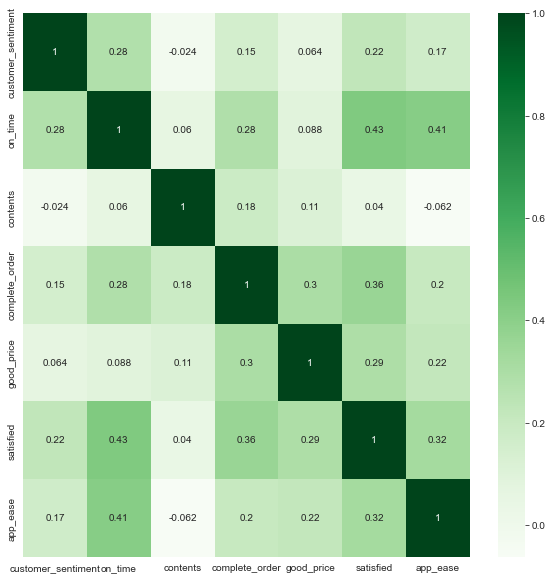

In [153]:
#plot correlation matrix heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

C:\Users\Tooman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


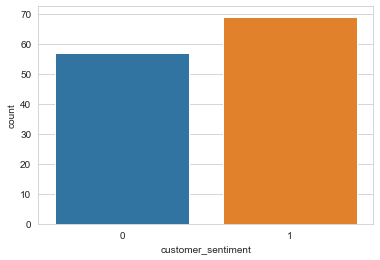

In [154]:
sns.countplot(df["customer_sentiment"],orient="V")
plt.show()

In [155]:
df['customer_sentiment'].value_counts()

1    69
0    57
Name: customer_sentiment, dtype: int64

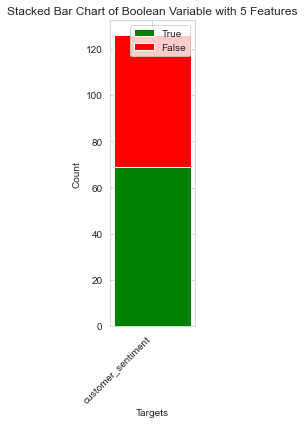

In [156]:
import matplotlib.pyplot as plt

# Sample data
Target = ['customer_sentiment']
true_counts = [69]  # Counts of True values for each feature
false_counts = [57]  # Counts of False values for each feature

# Plotting
plt.figure(figsize=(2, 6))

# Stacked bar chart
plt.bar(Target, true_counts, color='green', label='True')
plt.bar(Target, false_counts, bottom=true_counts, color='red', label='False')

plt.xlabel('Targets')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Variable with 5 Features')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Feature: 0, Score: 0.18464
Feature: 1, Score: 0.17206
Feature: 2, Score: 0.18673
Feature: 3, Score: 0.14201
Feature: 4, Score: 0.19050
Feature: 5, Score: 0.12405


C:\Users\Tooman\AppData\Local\Temp/ipykernel_18720/2555027443.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


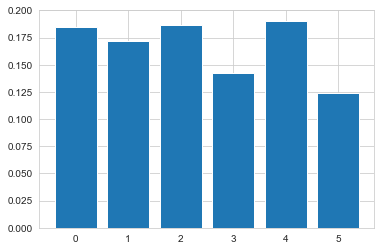

In [158]:
# random forest for feature importance on a regression problem
# define dataset
features = ['on_time', 'contents', 'complete_order', 'good_price', 'satisfied', 'app_ease']

X = df.loc[:, features]
y = df.loc[:, ['customer_sentiment']]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Text(0.5, 1.0, 'Feature Importance')

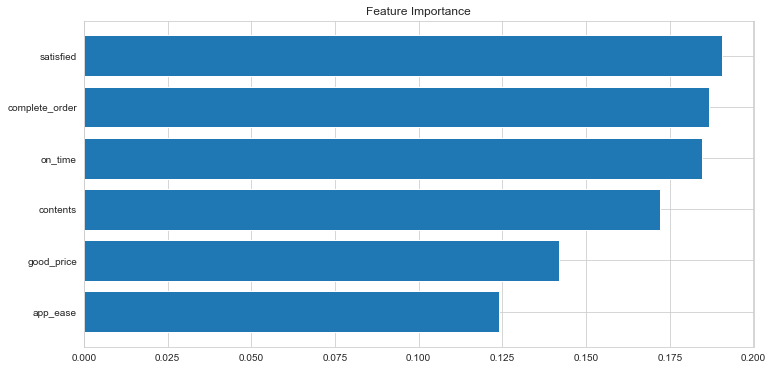

In [161]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Modeling

In [160]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [166]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Define the algorithms to use for modeling
model1 = LogisticRegression()
model2 = RandomForestClassifier(random_state=0)
model3 = AdaBoostClassifier(n_estimators=5)
model4 = KNeighborsClassifier()
model5 = SVC(kernel='linear')
model6 = XGBClassifier()

In [187]:
# Train the model on the training set
model1.fit(X_train_scaled,y_train)
model2.fit(X_train_scaled,y_train)
model3.fit(X_train_scaled,y_train)
model4.fit(X_train_scaled,y_train)
model5.fit(X_train_scaled,y_train)
model6.fit(X_train_scaled,y_train)

C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tooman\AppData\Local\Temp/ipykernel_18720/2816039474.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train_scaled,y_train)
C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Tooman\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [188]:
# Prediction for training data
y_train_pred1 = model1.predict(X_train_scaled)
y_train_pred2 = model2.predict(X_train_scaled)
y_train_pred3 = model3.predict(X_train_scaled)
y_train_pred4 = model4.predict(X_train_scaled)
y_train_pred5 = model5.predict(X_train_scaled)
y_train_pred6 = model6.predict(X_train_scaled)

In [189]:
# Check for training model accuracy
print(model1.score(X_train_scaled,y_train)) #Logistic Regression
print(model2.score(X_train_scaled,y_train)) #Random Forest Classifier
print(model3.score(X_train_scaled,y_train)) #AdaBoost Classifier
print(model4.score(X_train_scaled,y_train)) #KNearest Neighbors Classifier
print(model5.score(X_train_scaled,y_train)) #Support Vector Classifier
print(model5.score(X_train_scaled,y_train)) #XGBoost Classifier

0.61
0.96
0.64
0.74
0.63
0.63


In [171]:
# Prediction for test
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)

In [190]:
# Check for test model accuracy
print(model1.score(X_test_scaled,y_test)) #Logistic Regression
print(model2.score(X_test_scaled,y_test)) #Random Forest Classifier
print(model3.score(X_test_scaled,y_test)) #AdaBoost Classifier
print(model4.score(X_test_scaled,y_test)) #KNearest Neighbors Classifier
print(model5.score(X_test_scaled,y_test)) #Support Vector Classifier
print(model6.score(X_test_scaled,y_test)) #XGBoost Classifier

0.5384615384615384
0.6538461538461539
0.5769230769230769
0.5384615384615384
0.6153846153846154
0.6153846153846154


In [191]:
# Create classification Report for the train data

In [194]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.58      0.47      0.52        45
           1       0.62      0.73      0.67        55

    accuracy                           0.61       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.61      0.61      0.60       100



In [195]:
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.96      0.96      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [196]:
print(classification_report(y_train, y_train_pred3))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        45
           1       0.67      0.69      0.68        55

    accuracy                           0.64       100
   macro avg       0.64      0.63      0.63       100
weighted avg       0.64      0.64      0.64       100



In [197]:
print(classification_report(y_train, y_train_pred4))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70        45
           1       0.75      0.78      0.77        55

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [198]:
print(classification_report(y_train, y_train_pred5))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51        45
           1       0.63      0.80      0.70        55

    accuracy                           0.63       100
   macro avg       0.63      0.61      0.61       100
weighted avg       0.63      0.63      0.62       100



In [199]:
print(classification_report(y_train, y_train_pred6))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        45
           1       0.93      0.96      0.95        55

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [200]:
# Create classification Report for test

In [201]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.56      0.64      0.60        14

    accuracy                           0.54        26
   macro avg       0.53      0.53      0.53        26
weighted avg       0.53      0.54      0.53        26



In [202]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.65      0.79      0.71        14

    accuracy                           0.65        26
   macro avg       0.66      0.64      0.64        26
weighted avg       0.66      0.65      0.65        26



In [203]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.59      0.71      0.65        14

    accuracy                           0.58        26
   macro avg       0.57      0.57      0.56        26
weighted avg       0.57      0.58      0.57        26



In [204]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        12
           1       0.55      0.79      0.65        14

    accuracy                           0.54        26
   macro avg       0.53      0.52      0.49        26
weighted avg       0.53      0.54      0.50        26



In [205]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.61      0.79      0.69        14

    accuracy                           0.62        26
   macro avg       0.62      0.60      0.59        26
weighted avg       0.62      0.62      0.60        26



In [206]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.62      0.71      0.67        14

    accuracy                           0.62        26
   macro avg       0.61      0.61      0.61        26
weighted avg       0.61      0.62      0.61        26



In [80]:
# Check for model accuracy using the most important features and specific models (random forest and xgboost models).

Feature: 0, Score: 0.28875
Feature: 1, Score: 0.33060
Feature: 2, Score: 0.38065


C:\Users\Tooman\AppData\Local\Temp/ipykernel_18720/2972146258.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


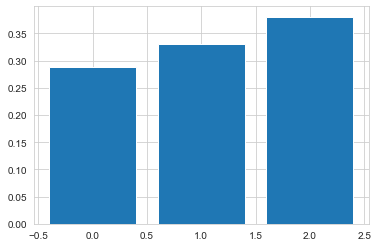

In [228]:
#choose reduced number of features
features = ['on_time','contents','satisfied'] #['on_time', 'contents', 'complete_order', 'good_price', 'satisfied', 'app_ease']



X = df.loc[:, features]
y = df.loc[:, ['customer_sentiment']]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [229]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [230]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
model = RandomForestClassifier(random_state=0, n_estimators = 100, max_depth = 5)

In [232]:
model.fit(X_train_scaled,y_train)

C:\Users\Tooman\AppData\Local\Temp/ipykernel_18720/2109830133.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,y_train)


RandomForestClassifier(max_depth=5, random_state=0)

In [233]:
y_train_pred = model.predict(X_train_scaled)

In [234]:
print(model.score(X_train_scaled,y_train))

0.79


In [235]:
y_pred = model.predict(X_test_scaled)

In [236]:
print(model.score(X_test_scaled,y_test))

0.6923076923076923


In [237]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73        44
           1       0.76      0.91      0.83        56

    accuracy                           0.79       100
   macro avg       0.80      0.77      0.78       100
weighted avg       0.80      0.79      0.78       100



In [238]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.65      0.85      0.73        13

    accuracy                           0.69        26
   macro avg       0.71      0.69      0.68        26
weighted avg       0.71      0.69      0.68        26



#### Check model using XGboost and metrics

In [239]:
model61 = XGBClassifier(learning_rate=0.1, n_estimators=5000, max_depth = 5, eval_metric='auc', verbosity=1)

In [240]:
eval_set = [(X_test_scaled, y_test)]

In [241]:
model61.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.76627
[1]	validation_0-auc:0.78402
[2]	validation_0-auc:0.78402
[3]	validation_0-auc:0.78402
[4]	validation_0-auc:0.78402
[5]	validation_0-auc:0.78402
[6]	validation_0-auc:0.78402
[7]	validation_0-auc:0.80178
[8]	validation_0-auc:0.80178
[9]	validation_0-auc:0.80178
[10]	validation_0-auc:0.80178
[11]	validation_0-auc:0.80178
[12]	validation_0-auc:0.80178
[13]	validation_0-auc:0.80178
[14]	validation_0-auc:0.80178
[15]	validation_0-auc:0.80178
[16]	validation_0-auc:0.80178


C:\Users\Tooman\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [242]:
y_train_pred = model61.predict_proba(X_train_scaled)[:,1]
y_test_pred = model61.predict_proba(X_test_scaled)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.7845
AUC Valid: 0.8018


#### Hyperparameter Tuning

In [243]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2,3,5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v)
    
print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

Now let us pass this to GridSearchCV. We have a custom scoring function based on sklearn's roc_auc_score() which calculated area under the curve. CV value is 2, which is not ideal but we want to minimize the execution time.

In [244]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model61.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.507, test=0.518) total time=   0.0s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.518, test=0.507) total time=   0.0s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.507, test=0.518) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.518, test=0.507) total time=   0.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.507, test=0.518) total time=   0.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.518, test=0.507) total time=   0.5s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.507, test=0.518) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.518, test=0.507) total time=   0.0s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                

Let us look at the output of grid search step. We will retain only a few relevant columns and sort based on rank_test_score i.ee the performance on validation data

In [245]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
0,1,0.512446,0.512446,0.02,2,1000
24,1,0.512446,0.512446,0.1,5,1000
23,1,0.512446,0.512446,0.1,3,3000
22,1,0.512446,0.512446,0.1,3,2000
21,1,0.512446,0.512446,0.1,3,1000
20,1,0.512446,0.512446,0.1,2,3000
19,1,0.512446,0.512446,0.1,2,2000
18,1,0.512446,0.512446,0.1,2,1000
17,1,0.512446,0.512446,0.05,5,3000
16,1,0.512446,0.512446,0.05,5,2000


Let us try to find how does model perfomance vary with respect to number of trees and depth of tree

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

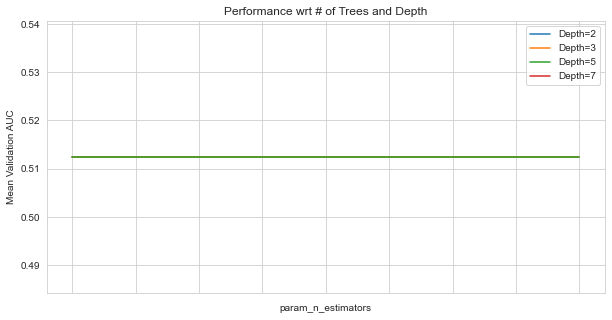

In [246]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Now that we have seen the performance is higher for higher values of trees and lower depth, let us find performance w.r.t. learning rate. We fix n_estimators to 3000 and depth to 2.

Text(0.5, 1.0, 'Performance wrt learning rate')

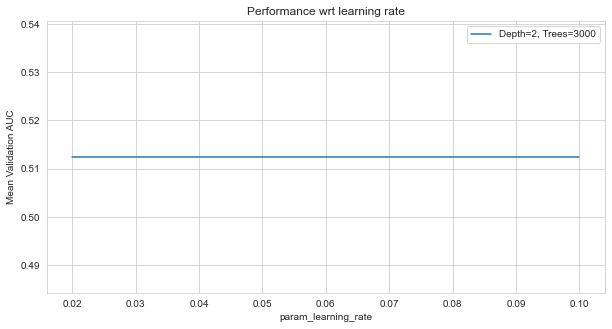

In [247]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
# Final model with the hyperparameters.

In [248]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.05,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train_scaled, y_train),(X_test_scaled, y_test)]

model_xgboost_fin.fit(X_train_scaled,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.63068	validation_1-auc:0.73077
[1]	validation_0-auc:0.62601	validation_1-auc:0.69231
[2]	validation_0-auc:0.63271	validation_1-auc:0.65976
[3]	validation_0-auc:0.62378	validation_1-auc:0.67160
[4]	validation_0-auc:0.63271	validation_1-auc:0.65976
[5]	validation_0-auc:0.61972	validation_1-auc:0.68639
[6]	validation_0-auc:0.63190	validation_1-auc:0.71006
[7]	validation_0-auc:0.63555	validation_1-auc:0.73373
[8]	validation_0-auc:0.63149	validation_1-auc:0.71598
[9]	validation_0-auc:0.64692	validation_1-auc:0.72485
[10]	validation_0-auc:0.64286	validation_1-auc:0.69527
[11]	validation_0-auc:0.64286	validation_1-auc:0.69527
[12]	validation_0-auc:0.67289	validation_1-auc:0.71893
[13]	validation_0-auc:0.64813	validation_1-auc:0.72485
[14]	validation_0-auc:0.64894	validation_1-auc:0.72485
[15]	validation_0-auc:0.64894	validation_1-auc:0.72485
[16]	validation_0-auc:0.64894	validation_1-auc:0.72485
[17]	validation_0-auc:0.65869	validation_1-auc:0.73077
[18]	validation_0-au

C:\Users\Tooman\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [250]:
y_train_pred = model_xgboost_fin.predict_proba(X_train_scaled)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_test_scaled)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))

AUC Train: 0.6356
AUC Valid: 0.8018
